# implementation of convolutional neural network

# submitted by - ekta gupta
[20100BTCSDSI07270]

In [2]:
import numpy as np # Linear algebra
import pandas as pd # data processing, CSV file 1/0 (e.g. pd.read_csv) 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix

import keras
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras.layers import MaxPooling2D, Convolution2D 
from keras.utils import np_utils
 
# Input data files are available in the "../input/" directory.

# For example, running this (by clicking run or pressing Shift+Enter) will Li

import os

# path to images

path = ("C:\\Users\\Nisha Jewellers\\Desktop\\rani\\sem 6th\\AI\\xray_dataset_covid19/")

# x-rays categories

categories = ['PNEUMONIA', 'NORMAL']

In [3]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [4]:
for category in categories:
    print(category)

PNEUMONIA
NORMAL


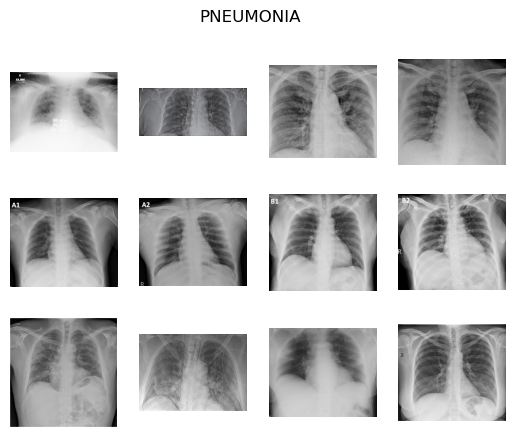

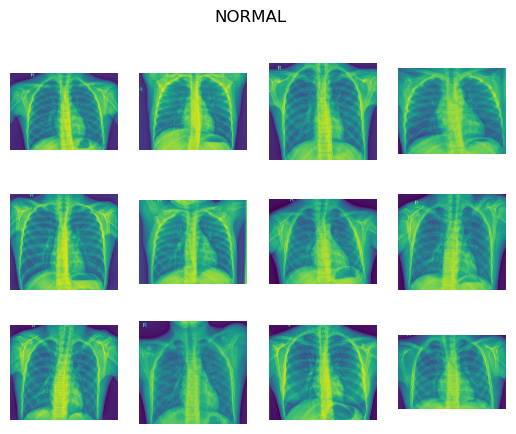

In [5]:
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [6]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+files).shape[0])
        shape1.append(plt.imread(path+category+'/'+files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape0))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape0))
    shape0 = []
    shape1 = []

PNEUMONIA  => height min :  237 width min :  237
PNEUMONIA  => height max :  4095 width max :  4095
NORMAL  => height min :  617 width min :  617
NORMAL  => height max :  2713 width max :  2713


In [7]:
# initialize the data and Labels

data= [] # append all images (resize) 
labels = [] # append the category /Label of image 
imagePaths  = [] # append the path of each image
WIDTH = 224
HEIGHT = 224
N_CHANNELS = 3

#grab the image paths and randomly shuffle them 
for k, category in enumerate(categories): 
    for f in os.listdir (path+category): 
        imagePaths.append([path+category+'/'+f, k])

print(imagePaths[:10]) 
import random
random.shuffle(imagePaths) 
print(imagePaths[:10])

[['C:\\Users\\Nisha Jewellers\\Desktop\\rani\\sem 6th\\AI\\xray_dataset_covid19/PNEUMONIA/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', 0], ['C:\\Users\\Nisha Jewellers\\Desktop\\rani\\sem 6th\\AI\\xray_dataset_covid19/PNEUMONIA/1-s2.0-S0140673620303706-fx1_lrg.jpg', 0], ['C:\\Users\\Nisha Jewellers\\Desktop\\rani\\sem 6th\\AI\\xray_dataset_covid19/PNEUMONIA/1-s2.0-S1684118220300608-main.pdf-001.jpg', 0], ['C:\\Users\\Nisha Jewellers\\Desktop\\rani\\sem 6th\\AI\\xray_dataset_covid19/PNEUMONIA/1-s2.0-S1684118220300608-main.pdf-002.jpg', 0], ['C:\\Users\\Nisha Jewellers\\Desktop\\rani\\sem 6th\\AI\\xray_dataset_covid19/PNEUMONIA/1-s2.0-S1684118220300682-main.pdf-002-a1.png', 0], ['C:\\Users\\Nisha Jewellers\\Desktop\\rani\\sem 6th\\AI\\xray_dataset_covid19/PNEUMONIA/1-s2.0-S1684118220300682-main.pdf-002-a2.png', 0], ['C:\\Users\\Nisha Jewellers\\Desktop\\rani\\sem 6th\\AI\\xray_dataset_covid19/PNEUMONIA/1-s2.0-S1684118220300682-main.pdf-003-b1.png', 0], ['C:\\Users\\Nisha Jewellers\\Deskto

In [8]:
#Loop over the input images 
for imagePath in imagePaths:
    # Load the image, resize the image to be HEIGHT WIDTH pixels (ignoring 
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT)) # .flatten() 
    data.append(image)

    # extract the class label from the image path and update the
    # Labels List
    label = imagePath[1]
    labels.append(label)

In [9]:
data[0]

array([[[ 1,  1,  1],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [13, 13, 13],
        [14, 14, 14],
        [15, 15, 15]],

       [[ 1,  1,  1],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [13, 13, 13],
        [14, 14, 14],
        [15, 15, 15]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [15, 15, 15],
        [13, 13, 13],
        [15, 15, 15]],

       ...,

       [[ 6,  6,  6],
        [ 1,  1,  1],
        [ 2,  2,  2],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[ 6,  6,  6],
        [ 1,  1,  1],
        [ 4,  4,  4],
        ...,
        [ 9,  9,  9],
        [11, 11, 11],
        [10, 10, 10]],

       [[ 4,  4,  4],
        [ 0,  0,  0],
        [ 3,  3,  3],
        ...,
        [ 9,  9,  9],
        [11, 11, 11],
        [ 9,  9,  9]]], dtype=uint8)

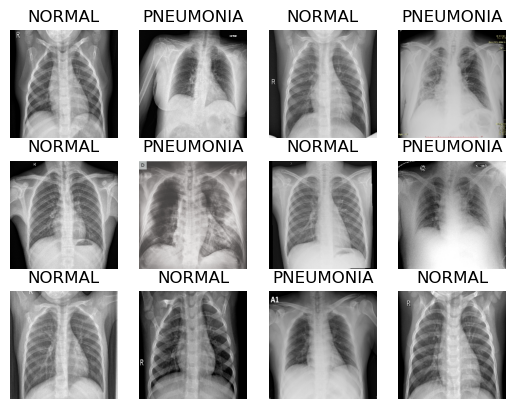

In [10]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0 # independent features
labels = np.array(labels) # dependent features
# Let's check everything is ok
plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories [labels[i]])
plt.show()



In [11]:
data[0]
len(data)

148

# Import the model

In [12]:
from sklearn.model_selection import train_test_split 
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2)
#Preprocess class Labels 
print(trainY) 
trainY = np_utils.to_categorical(trainY,2) # actual y

print(trainX.shape)
print(testX.shape) 
print(trainY. shape) 
print(testY.shape)

[0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1
 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1
 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1
 0 1 1 0 0 1 1]
(118, 224, 224, 3)
(30, 224, 224, 3)
(118, 2)
(30,)


# Train the model

In [13]:
trainX[0]

array([[[0.01568627, 0.01568627, 0.01568627],
        [0.02352941, 0.02352941, 0.02352941],
        [0.01568627, 0.01568627, 0.01568627],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.01176471, 0.01176471, 0.01176471],
        [0.        , 0.        , 0.        ],
        [0.01960784, 0.01960784, 0.01960784],
        ...,
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        [0.        , 0.        , 0.        ]],

       [[0.00784314, 0.00784314, 0.00784314],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.83529412, 0.82745098, 0.82745098],
        [0.        , 0.        , 0.00392157],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.45490196, 0.45490196, 0.45490196],
        [0.51764706, 0.51764706, 0.51764706],
        [0.56470588, 0

In [14]:
trainY

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [15]:
model = Sequential()
# step 1 convolutional Layer
model.add(Convolution2D(32, (2, 2), activation='relu', input_shape=(HEIGHT,WIDTH,3)))
#step 2 - pooling Layer   
model.add(MaxPooling2D(pool_size=(2, 2)))
#step 3 - falttening
model.add(Flatten()) # to convert array of image into 1D
#step 4 full connectio
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 128)               50466944  
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 50,467,618
Trainable params: 50,467,618
Non-trainable params: 0
____________________________________________

In [16]:
model.fit(trainX,trainY,batch_size=32, epochs=2, verbose=1)

Epoch 1/2
4/4 [==============================] - 70s 15s/step - loss: 14.4090 - accuracy: 0.6186
Epoch 2/2
4/4 [==============================] - 72s 20s/step - loss: 4.9614 - accuracy: 0.7034


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


1/1 [==============================] - 4s 4s/step


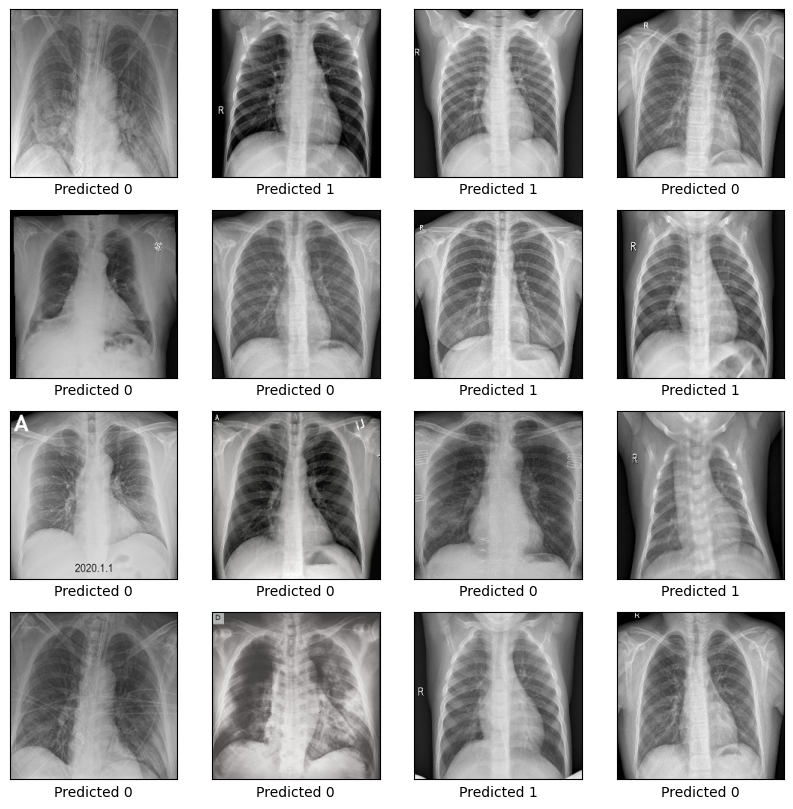

In [18]:
from numpy import argmax
pred = model.predict(testX) 
predictions = argmax(pred, axis=1) # return to Label #pred

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1) 
    plt.imshow(testX[i])
    #plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(f'Predicted {predictions[i]}')
plt.show()

In [19]:
predictions = argmax(pred, axis=1)
print(predictions)

[0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0]


In [20]:
print(testY)

[0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0]


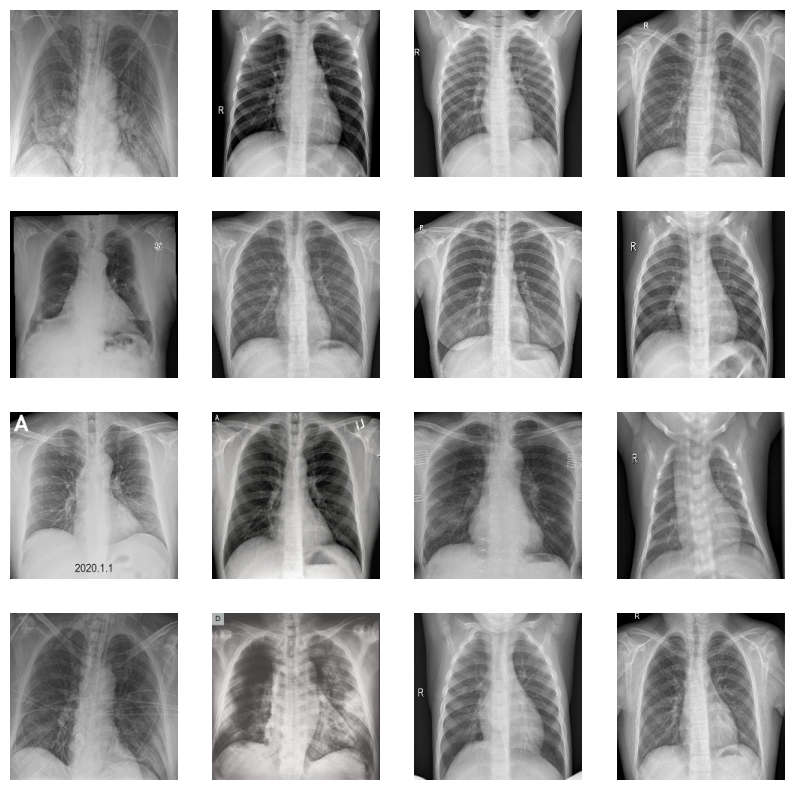

In [21]:
plt.figure(figsize=(10,10))
for i in range(16): 
    plt.subplot(4,4,i+1)
    plt.imshow(testX[i]) 
    plt.axis('off')
    plt.xticks([])
    plt.yticks([]) 
    plt.grid(False)
    plt.xlabel(f'Predicted - {testY[i]}') 
plt.show()

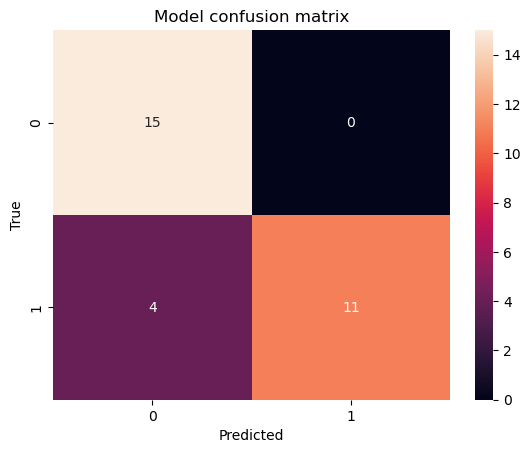

Accuracy : 86.67XX


In [22]:
predictions = argmax(pred, axis=1) #return to label
cm = confusion_matrix(testY, predictions)

plt.title('Model confusion matrix')
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted') 
plt.ylabel('True')
plt.show()
accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2fXX" % (accuracy*100.0))

In [23]:
cm

array([[15,  0],
       [ 4, 11]], dtype=int64)

In [24]:
print(classification_report(testY, predictions))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.73      0.85        15

    accuracy                           0.87        30
   macro avg       0.89      0.87      0.86        30
weighted avg       0.89      0.87      0.86        30



In [28]:
from keras.utils import load_img, img_to_array 
import numpy as np
from keras.preprocessing import image
test_image = load_img("C:\\Users\\Nisha Jewellers\\Desktop\\rani\\sem 6th\\AI\\xray_dataset_covid19\\PNEUMONIA\\1-s2.0-S1684118220300608-main.pdf-001.jpg", target_size = (224, 224)) 
test_image = img_to_array(test_image, dtype="float") / 255.0 
test_image = np.expand_dims(test_image, axis=0)
from numpy import argmax
result = model.predict(test_image)
if result[0][0]==1:
    prediction = 'NORMAL' 


else:
    prediction = 'PNEUMONIA' 
    print(prediction)

1/1 [==============================] - 2s 2s/step
